In [879]:
%matplotlib inline

In [880]:
import matplotlib.pyplot as plt
import geopandas

In [881]:
america = geopandas.read_file("data/america_initpoint")
america.head(5)

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,29,195,22096,00767361,0600000US2919522096,2919522096,Elmwood,Elmwood township,MO,Saline County,Missouri,44,181233131,377337,"POLYGON ((-93.48978 39.06658, -93.48938 39.073..."
1,38,099,45260,01036531,0600000US3809945260,3809945260,Latona,Latona township,ND,Walsh County,North Dakota,44,90848624,2941846,"POLYGON ((-98.16255 48.36954, -98.05746 48.369..."
2,38,017,16100,01036391,0600000US3801716100,3801716100,Cornell,Cornell township,ND,Cass County,North Dakota,44,93440087,0,"POLYGON ((-97.70538 47.04981, -97.70558 47.051..."
3,38,093,22940,01036472,0600000US3809322940,3809322940,Eldridge,Eldridge township,ND,Stutsman County,North Dakota,44,90001176,2572532,"POLYGON ((-98.94567 46.97918, -98.85914 46.979..."
4,38,079,67780,01036243,0600000US3807967780,3807967780,Rolette,Rolette city,ND,Rolette County,North Dakota,25,2609731,0,"POLYGON ((-99.85266 48.6682, -99.83068 48.6681..."


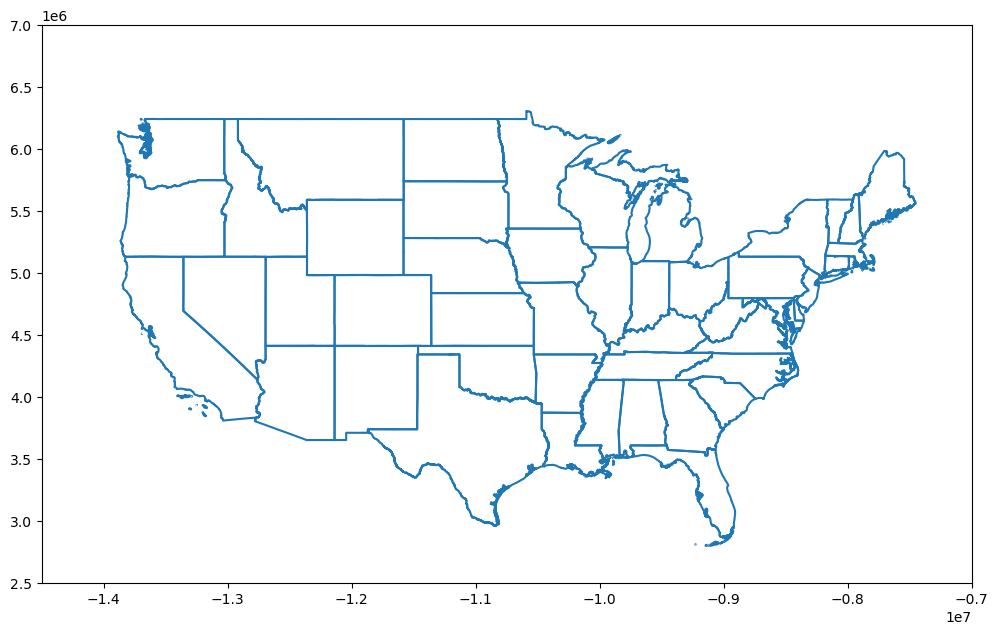

In [882]:
states = america.dissolve(by="STUSPS")
states = states.to_crs("EPSG:3395")

fig, ax = plt.subplots(figsize=(12, 16))

ax.set_xlim(-14500000, -7000000)
ax.set_ylim(2500000, 7000000)

states.boundary.plot(ax=ax)

plt.savefig("jack_state_borders.png")

plt.show()

In [883]:
tornados = geopandas.read_file("data/tornado_initpoint")
tornados = tornados.to_crs("EPSG:3395")

In [884]:
tornados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 63645 entries, 0 to 63644
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   om        63645 non-null  int64   
 1   yr        63645 non-null  int64   
 2   mo        63645 non-null  int64   
 3   dy        63645 non-null  int64   
 4   date      63645 non-null  object  
 5   time      63645 non-null  object  
 6   tz        63645 non-null  int64   
 7   st        63645 non-null  object  
 8   stf       63645 non-null  int64   
 9   stn       63645 non-null  int64   
 10  mag       63645 non-null  int64   
 11  inj       63645 non-null  int64   
 12  fat       63645 non-null  int64   
 13  loss      63645 non-null  float64 
 14  closs     63645 non-null  float64 
 15  slat      63645 non-null  float64 
 16  slon      63645 non-null  float64 
 17  elat      63645 non-null  float64 
 18  elon      63645 non-null  float64 
 19  len       63645 non-null  float64 
 20

In [885]:
tornados.head(5)

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.0,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,POINT (-10043244.459 4662018.86)
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,5.0,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,POINT (-9940830.528 4709053.526)
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,4.0,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,POINT (-9415402.531 4966686.373)
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,3.0,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,POINT (-10505220.346 4058499.57)
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,5.0,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,POINT (-10094451.425 4496998.866)


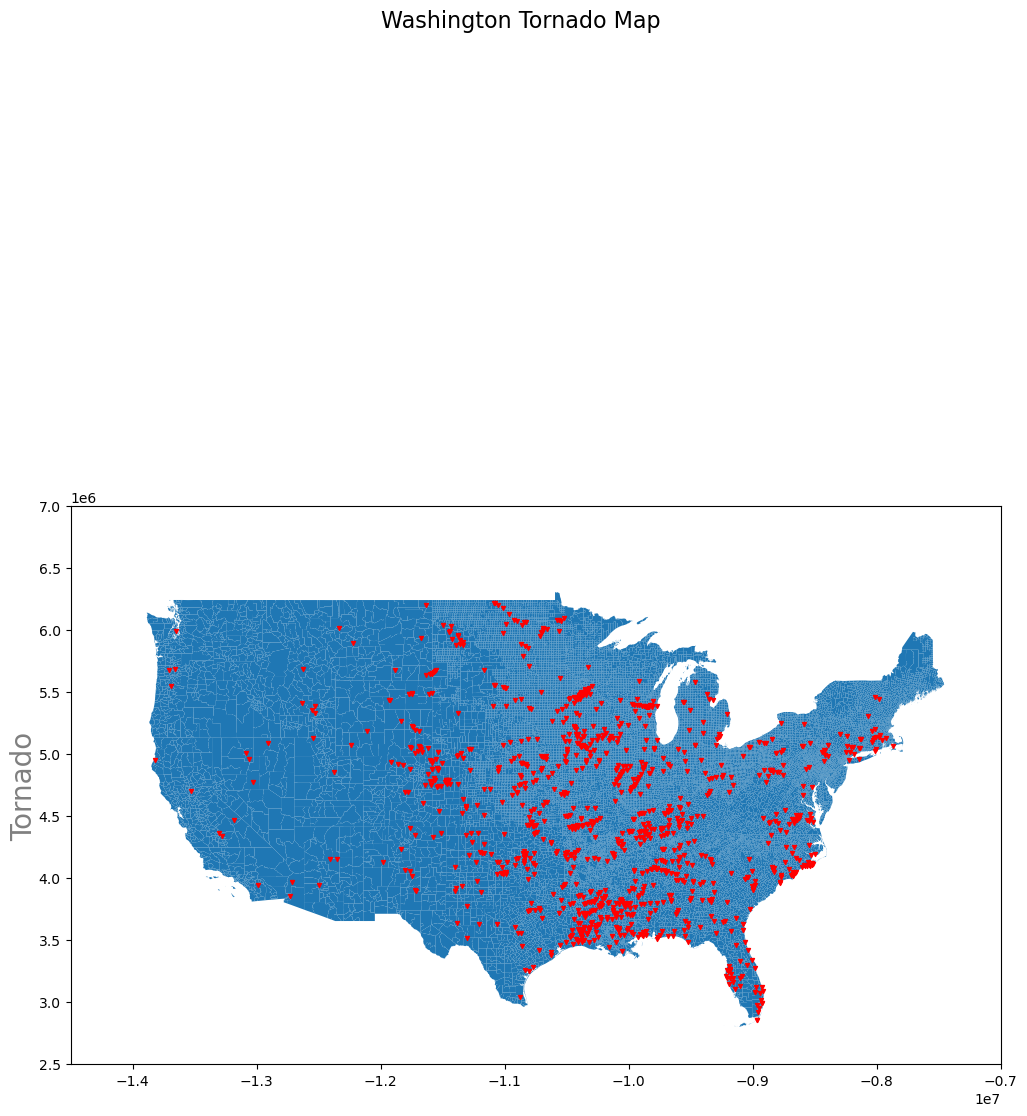

In [886]:
tornados_2018 = tornados[tornados["yr"] == 2018]

areas = america.to_crs("EPSG:3395")

fig = plt.figure(1, figsize=(12, 16)) 
ax = fig.add_subplot()

ax.set_xlim(-14500000, -7000000)
ax.set_ylim(2500000, 7000000)

fig.suptitle("Washington Tornado Map", fontsize=16)

areas.plot(ax=ax, linewidth=.8)

tornados_2018.plot(ax=ax, color='red', marker='v', markersize=8)
ax.text(-0.05, 0.5, 'Tornado', transform=ax.transAxes,
        fontsize=20, alpha=0.5,
        ha='center', va='center', rotation=90)

plt.savefig("jack_tornados_2018.png")

plt.show()

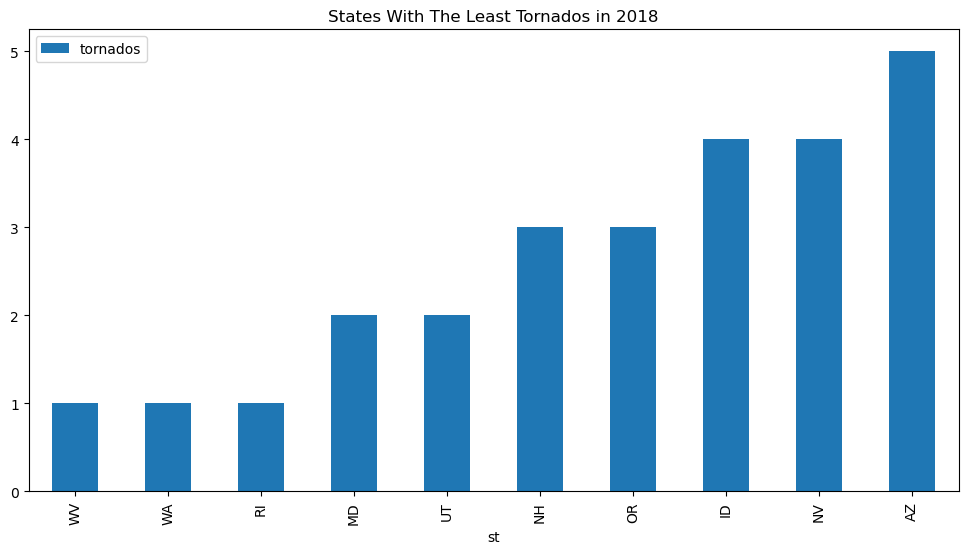

In [887]:
twisters_by_state = tornados.copy()

twisters_by_state = twisters_by_state[twisters_by_state["yr"] == 2018]

twisters_by_state['tornados'] = 1

twisters_by_state = twisters_by_state[['st','tornados']].groupby('st').count()

twisters_by_state.sort_values('tornados', ascending=True)[:10].plot.bar(figsize=(12,6), title='States With The Least Tornados in 2018')

plt.savefig("jack_least_tornados_2018.png")

plt.show()

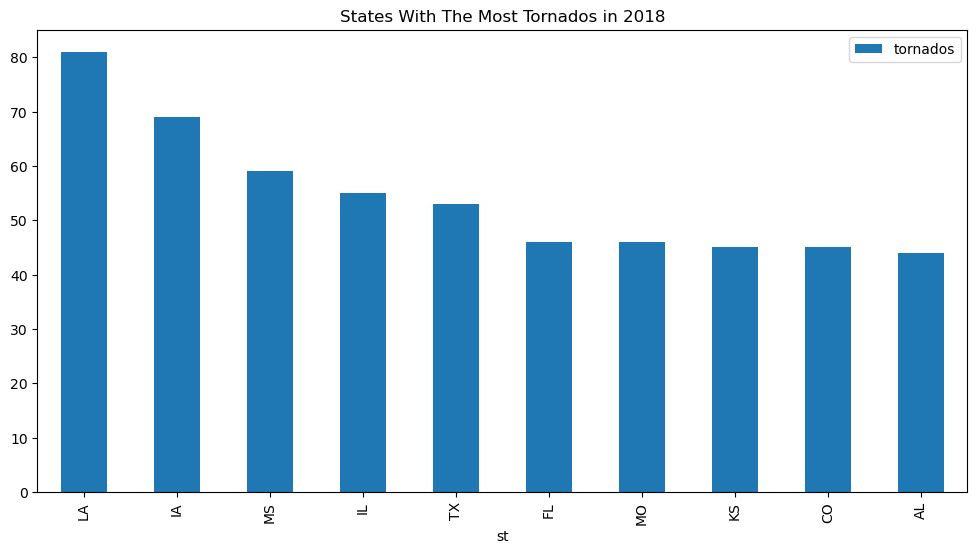

In [888]:
twisters_by_state = tornados.copy()

twisters_by_state = twisters_by_state[twisters_by_state["yr"] == 2018]

twisters_by_state['tornados'] = 1

twisters_by_state = twisters_by_state[['st','tornados']].groupby('st').count()

twisters_by_state.sort_values('tornados', ascending=False)[:10].plot.bar(figsize=(12,6), title='States With The Most Tornados in 2018')

plt.savefig("jack_most_tornados_2018.png")

plt.show()

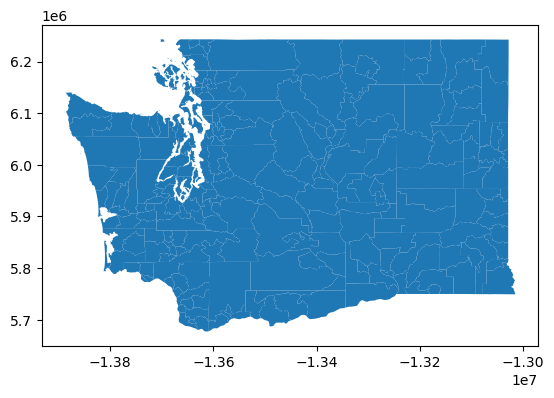

In [889]:
washington_map = areas[areas["STUSPS"] == "WA"]
washington_map.plot()

plt.savefig("jack_washington.png")

plt.show()

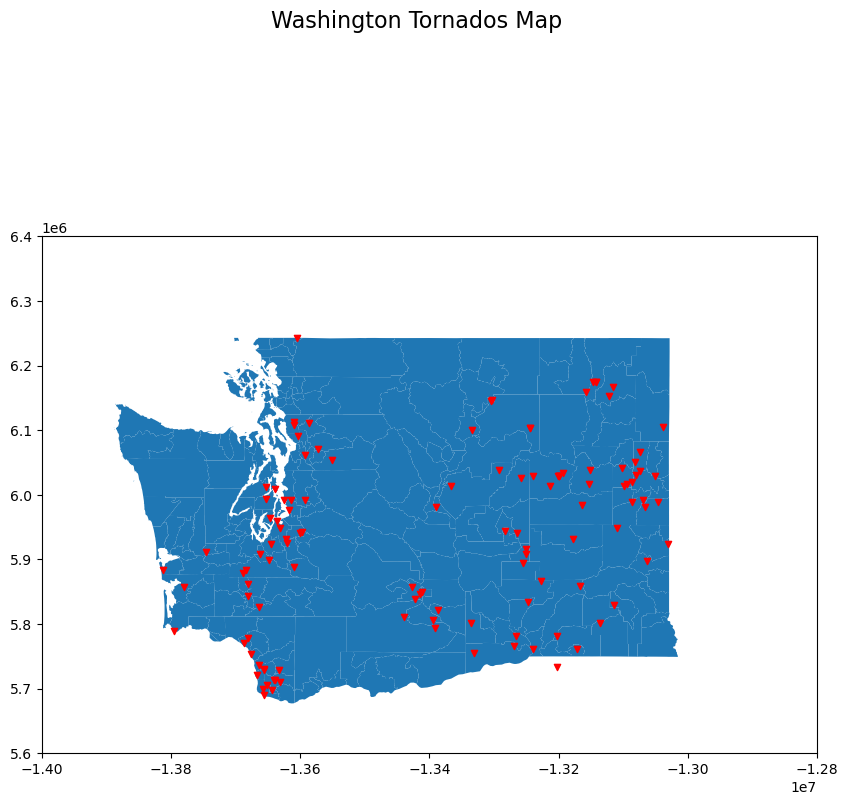

In [890]:
washington_twisters = tornados[tornados["st"] == "WA"]

fig = plt.figure(1, figsize=(10,10)) 
ax = fig.add_subplot()

ax.set_xlim(-14000000, -12800000)
ax.set_ylim(5600000, 6400000)

fig.suptitle('Washington Tornados Map', fontsize=16)

washington_map.plot(ax=ax, linewidth=.8)

washington_twisters.plot(ax=ax, color='red', marker='v', markersize=20)

plt.savefig("jack_washington_tornados.png")

plt.show()

In [891]:
tornado_paths = geopandas.read_file("data/tornado_path_initpoint")

In [892]:
tornado_paths.head(5)

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.0,0.0,38.77,-90.22,38.8300,-90.0300,9.5,150,0,"LINESTRING (-90.22 38.77, -90.03 38.83)"
1,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,5.0,0.0,39.10,-89.30,39.1200,-89.2300,3.6,130,0,"LINESTRING (-89.3 39.1, -89.23 39.12)"
2,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,4.0,0.0,40.88,-84.58,40.8801,-84.5799,0.1,10,0,"LINESTRING (-84.58 40.88, -84.5799 40.8801)"
3,4,1950,1,13,1950-01-13,05:25:00,3,AR,5,1,...,3.0,0.0,34.40,-94.37,34.4001,-94.3699,0.6,17,0,"LINESTRING (-94.37 34.4, -94.3699 34.4001)"
4,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,...,5.0,0.0,37.60,-90.68,37.6300,-90.6500,2.3,300,0,"LINESTRING (-90.68 37.6, -90.65 37.63)"


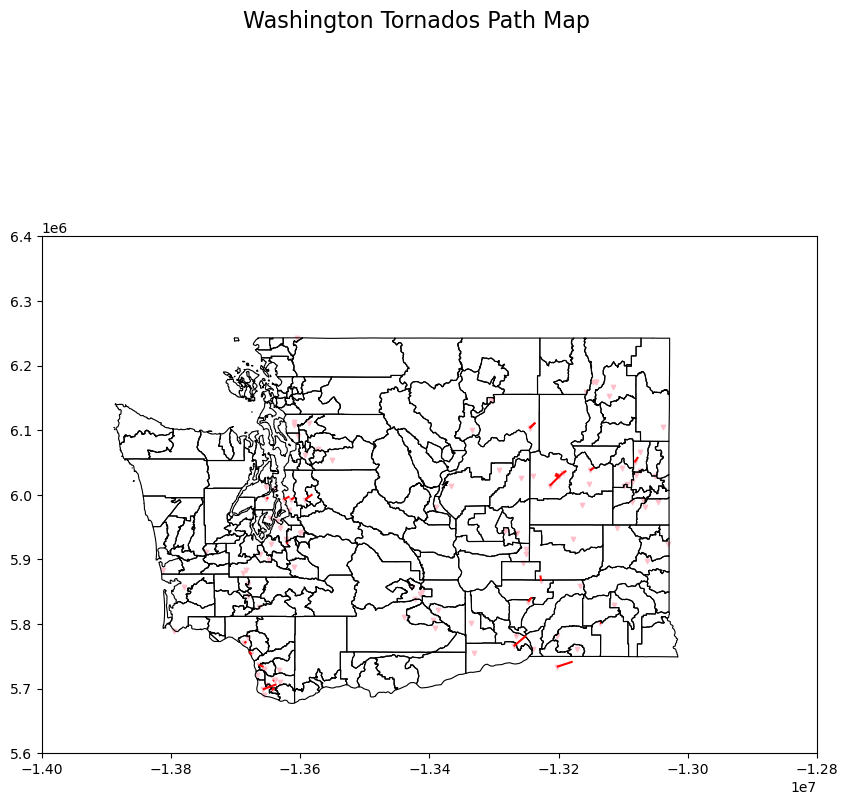

In [893]:
tornado_paths = tornado_paths.to_crs("EPSG:3395")

washington_twister_paths = tornado_paths[tornado_paths["st"] == "WA"]

fig = plt.figure(1, figsize=(10,10)) 
ax = fig.add_subplot()

ax.set_xlim(-14000000, -12800000)
ax.set_ylim(5600000, 6400000)

fig.suptitle('Washington Tornados Path Map', fontsize=16)

washington_map.boundary.plot(ax=ax, color='black', linewidth=.8)
washington_twisters.plot(ax=ax, color='pink', marker='v', markersize=10)
washington_twister_paths.plot(ax=ax, color='red')

plt.savefig("jack_washington_tornados_paths.png")

plt.show()

Five graphics are shown.
1: A map showing all the tornados in 2018 (most recent recorded year in the dataset). It shows that most tornados happen in the east.
2: A bar graph showing the 10 states with the least tornados back in 2018. It shows that each state has had at least one tornado in 2018. Our state only had one.
3: A bar graph showing the 10 states with the most tornados back in 2018. It shows that the states with the most tornados in 2018 had dozens, and Louisiana had 80.
4: A map showing tornado locations in Washington state. It shows that there's a middle area where none have appeared. Also none have appeared in the upper left corner.
5: A map showing tornado paths in Washington state. It shows that most of them didn't travel very far.